# Lab 2

Below we provide sample code for the SIFT detector using SIFT_create() function from opencv_contrib package

In [46]:
import math
import numpy as np
import sys

import cv2
import matplotlib.pyplot as plt

def mplib_show(img):
    """
    Shows an image using matplotlib because cv2 crashes in WSL.
    """
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')

In [47]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [48]:
# Function to rotate an input image
# parameters:
            # image: image to rotate
            # x: x-coordinate of point we wish to rotate around
            # y: y-coordinate of point we wish to rotate around
            # angle: degrees to rotate image by
# returns: rotated copy of the original image

def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

In [5]:
# Function to get coordinates of center point in an image
# parameter:
            # image: image that will be rotated
# returns: (x,y) coordinates of point at the centre of an image

def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2
    return center

## Task 1: Read the given sample image "Beehive_Corner_Adelaide.png" and compute the SIFT features of the given image.
- Extract SIFT features with default parameters and show the keypoints on the image.
- To achieve better visualization of the keypoints, reduce the number of keypoints. Hint: Vary the parameter contrastThreshold or nfeatures so that the number of keypoints becomes about 10% of all default keypoints.

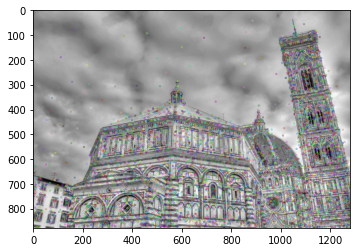

In [7]:
# Write your code here and display original image and images obtained in 1(a) and 1(b)
# you guys should really update the text when you change the lab.

# default keypoints
img = cv2.imread("Cathedral.png")
g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sd = SiftDetector().get_detector(None)
img = cv2.drawKeypoints(g, sd.detect(g, None), img)
mplib_show(img)



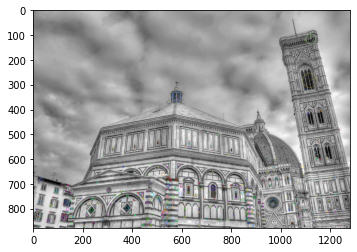

In [23]:
# adjusted keypoints
img = cv2.imread("Cathedral.png")
g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

params = {
    "n_features" : 600,
    "n_octave_layers" : 3,
    "contrast_threshold" : 0.03,
    "edge_threshold" : 10,
    "sigma" : 2.5,
}
sd = SiftDetector().get_detector(params)
img = cv2.drawKeypoints(g, sd.detect(g, None), img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
mplib_show(img)

### Part b)
I adjusted n_features up because changing the edge threshold filters out indisciminately while n_features(x) preserve the best x features. I also increased sigma to give larger features and added the rich keypoints flag for better visualisation.

## Task 2: Change the scale of the image and recompute the SIFT features.
:|


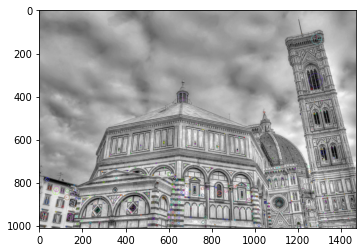

In [38]:
img = cv2.imread("Cathedral.png")
og = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# A: scaling
img = cv2.resize(img, None, fx=1.15, fy=1.15)
g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# B: SIFT
params = {
    "n_features" : 600,
    "n_octave_layers" : 3,
    "contrast_threshold" : 0.03,
    "edge_threshold" : 10,
    "sigma" : 2.5,
}
sd = SiftDetector().get_detector(params)
img1 = cv2.drawKeypoints(g, sd.detect(g, None), img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

mplib_show(img1)

# C:
# they are indeed roughly the same. the scale invariant feature transform is scale invariant 

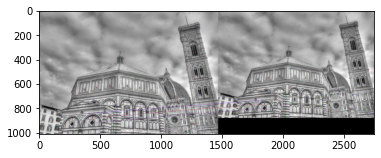

In [52]:
# D
bfm = cv2.BFMatcher()
kp1, d1 = sd.detectAndCompute(g, None)
kp2, d2 = sd.detectAndCompute(og, None)
matched = bfm.knnMatch(d1, d2, k=2)
# ratio test
matched_ = []
for m,n in matched:
    if m.distance < 0.7*n.distance:
        matched_.append([m])

out = cv2.drawMatchesKnn(g, kp1, og, kp2, matched_[:5], None)
mplib_show(out)

## Task 3: Rotate the image and recompute the SIFT features.
- Rotate the given image anticlockwise by 60 degrees.
- Extract the SIFT features and show the keypoints on the rotated image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the rotated image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the rotated image.

60 deg


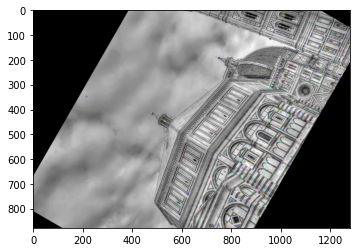

In [61]:
img = cv2.imread("Cathedral.png")
og = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# A: rotation
img60 = cv2.cvtColor(rotate(img, img.shape[1]/2, img.shape[0]/2, 60), cv2.COLOR_BGR2GRAY)
img120 = cv2.cvtColor(rotate(img, img.shape[1]/2, img.shape[0]/2, 120), cv2.COLOR_BGR2GRAY)

# B: SIFT
params = {
    "n_features" : 600,
    "n_octave_layers" : 3,
    "contrast_threshold" : 0.03,
    "edge_threshold" : 10,
    "sigma" : 2.5,
}

sd = SiftDetector().get_detector(params)
kp1, d1 = sd.detectAndCompute(img60, None)
kp2, d2 = sd.detectAndCompute(img120, None)
img60 = cv2.drawKeypoints(img60, kp1, img60)
img120 = cv2.drawKeypoints(img120, kp2, img120)
print("60 deg")
mplib_show(img60)



120 deg


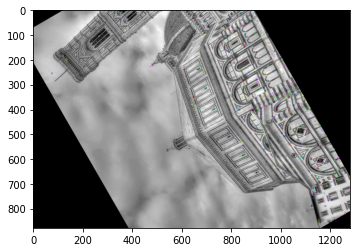

In [62]:
# 120
print("120 deg")
mplib_show(img120)

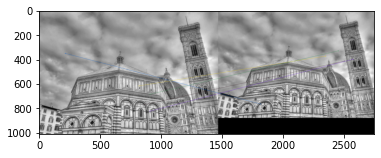

In [65]:
# C
# again, they are basically the same. as discussed in the lectures SIFT is resistant to rotation

# D: keypoint matching
matched = bfm.knnMatch(d1, d2, k=2)
# ratio test
matched_ = []
for m,n in matched:
    if m.distance < 0.7*n.distance:
        matched_.append([m])
out = cv2.drawMatchesKnn(g, kp1, og, kp2, matched_[:5], None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
mplib_show(out)